In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Attempt at PCA 

In [4]:
# change directories -- DON'T RUN MORE THAN ONCE
#os.chdir(os.path.dirname(os.getcwd()))
#os.chdir(os.path.dirname(os.getcwd()))
#os.chdir('Data')

#This is only for Meera
os.chdir('/Users/meera/Documents/drugs/Data')


In [53]:
# read in data
df = pd.read_csv('pca_data.csv')
df = df[(df['Year'] >= 2011) & (df['Year'] <= 2019)]
X = df.drop(['Cruder_Rate', 'Crude_Rate', 'geometry', 'FIPS', 'State', 'County', 'Latitude', 'Longitude', 'Urbanicity', 'Jail_Population', 'Incarceration_Rate_per_100k', 'Dispense_rate'], axis = 1)
y = df['Cruder_Rate']
df.isnull().sum()

Year                              0
FIPS                              0
State                             0
County                            0
Deaths                            0
Population                        0
Crude_Rate                        0
Cruder_Rate                       0
Deathrate_per_100                 0
Unemployment_rate                 0
Dispense_rate                     2
SUMLEV                            0
AGEGRP                            0
TOT_POP                           0
TOT_MALE                          0
TOT_FEMALE                        0
WA_MALE                           0
WA_FEMALE                         0
BA_MALE                           0
BA_FEMALE                         0
IA_MALE                           0
IA_FEMALE                         0
AA_MALE                           0
AA_FEMALE                         0
NA_MALE                           0
NA_FEMALE                         0
TOM_MALE                          0
TOM_FEMALE                  

<AxesSubplot:>

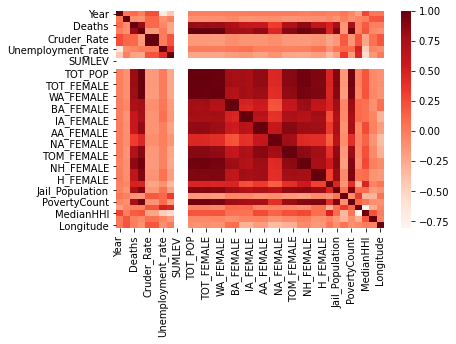

In [54]:
sns.heatmap(df.corr(), cmap = "Reds")

In [55]:
X.isnull().sum()

Year                 0
Deaths               0
Population           0
Deathrate_per_100    0
Unemployment_rate    0
SUMLEV               0
AGEGRP               0
TOT_POP              0
TOT_MALE             0
TOT_FEMALE           0
WA_MALE              0
WA_FEMALE            0
BA_MALE              0
BA_FEMALE            0
IA_MALE              0
IA_FEMALE            0
AA_MALE              0
AA_FEMALE            0
NA_MALE              0
NA_FEMALE            0
TOM_MALE             0
TOM_FEMALE           0
NH_MALE              0
NH_FEMALE            0
H_MALE               0
H_FEMALE             0
PovertyCount         0
PovertyPercentage    0
MedianHHI            0
dtype: int64

[1.71064685e+01 2.62349251e+00 2.06388441e+00 1.39683547e+00
 1.14428895e+00 7.56530588e-01 5.85538872e-01 3.91147544e-01
 3.35643288e-01 2.64281927e-01 1.49285091e-01 1.10351246e-01
 4.20483520e-02 2.89688629e-02 1.73611750e-03 1.01156418e-03
 6.03599092e-04 4.71514875e-04 4.02974272e-04 1.90779814e-04
 1.54294547e-04 1.51238411e-05 4.69761717e-31 1.72657277e-31
 9.84680740e-32 9.84680740e-32 9.84680740e-32 9.84680740e-32
 6.29389667e-32]
[6.33494270e+01 9.71543293e+00 7.64306758e+00 5.17282260e+00
 4.23758119e+00 2.80161737e+00 2.16839332e+00 1.44851480e+00
 1.24296900e+00 9.78700465e-01 5.52839121e-01 4.08657591e-01
 1.55715308e-01 1.07278768e-01 6.42926676e-03 3.74606899e-03
 2.23527472e-03 1.74613464e-03 1.49231206e-03 7.06504203e-04
 5.71390357e-04 5.60072740e-05 1.73964227e-30 6.39392029e-31
 3.64651306e-31 3.64651306e-31 3.64651306e-31 3.64651306e-31
 2.33078352e-31]


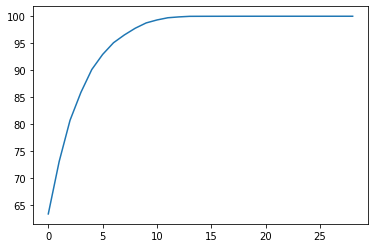

In [56]:
# let's do the PCA
sc = StandardScaler()
x_scaled = sc.fit_transform(X)
pca = PCA(n_components = None)
pca.fit(x_scaled)

# these are the eigenvalues
print(pca.explained_variance_)

# these are the explained variances
print(pca.explained_variance_ratio_ * 100)

# make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))

In [57]:
# let's look at feature importance
print(abs( pca.components_ ))

[[3.31294922e-03 1.94047374e-01 2.39517821e-01 4.12148893e-02
  1.72083262e-03 3.25260652e-19 0.00000000e+00 2.39503352e-01
  2.39592743e-01 2.39354415e-01 2.34378457e-01 2.33776833e-01
  1.85597058e-01 1.80309670e-01 1.96001703e-01 1.90352614e-01
  2.10804394e-01 2.11539575e-01 1.30295442e-01 1.32661389e-01
  2.22479573e-01 2.24542855e-01 2.30894375e-01 2.29940226e-01
  2.18381594e-01 2.17084932e-01 2.30126352e-01 7.67146259e-03
  4.81193304e-02]
 [3.47545411e-01 1.33871299e-03 1.50657351e-02 7.96564274e-02
  4.74763927e-01 2.77555756e-17 6.93889390e-18 1.51327891e-02
  1.32117206e-02 1.69826470e-02 8.61491763e-03 1.01339352e-02
  1.11662275e-01 1.15662721e-01 7.85854169e-02 8.18150039e-02
  7.34576248e-02 7.37788593e-02 1.52274871e-01 1.51555164e-01
  8.83877522e-02 8.06398300e-02 2.11885155e-02 1.47089575e-02
  6.62269645e-02 6.76968185e-02 1.18965930e-01 5.08053990e-01
  5.04416366e-01]
 [1.83312346e-01 1.80316644e-01 7.31616583e-02 4.96191506e-02
  1.93428317e-01 0.00000000e+00 0.

<AxesSubplot:>

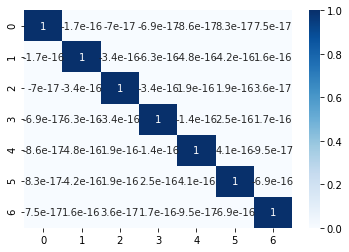

In [58]:
pca = PCA(n_components = 7)
X_pca = pca.fit_transform(x_scaled)
X_pca = pd.DataFrame(X_pca)

sns.heatmap(X_pca.corr(), annot = True, cmap = "Blues")

Okay, so above we did PCA on our dummy dataset (dropping columns with any missing values for our dataset between 2011 - 2019). It seems that it worked, considering after doing PCA and selecting the first 7 principal components, we have low multicollinearity between our variables.

## Transform the Response variables 

<AxesSubplot:>

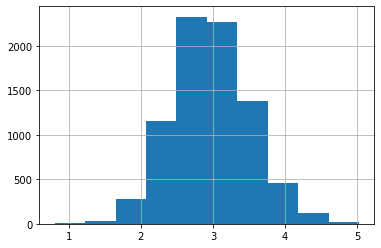

In [59]:
# log transform the response 
# ONLY RUN IT ONCE 

df.head()
df['log_cruder_Rate'] = np.log(df['Cruder_Rate'])
df.head()
df['log_cruder_Rate'].hist()

## Elastic Net
Because PCA lacks interpretablity we are going to introduce Elastic Net in order to decrease variables that have 

According to Peng elastic net (that has the ridge penalty) can deal with collinearity better than lasso 

According to Wikepedia ways to deal with multicollinearity include: getting more data, drop a variable, standardize the independent variables, PCA, partial least squares regression, ridge regression..., leaving the model as is ?? --> this is because doesn't affect the predictor from fitting the model. 

- how do we get rid of multicollinearity but keep interpretability 
    - ELASTIC NET atttept 
 
- Is there a way to see which interaction terms are useful ? 

In [60]:
df = df.drop(['Cruder_Rate', 'Crude_Rate', 'geometry', 'FIPS', 
              'State', 'County', 'Latitude', 'Longitude', 'Urbanicity', 
              'Jail_Population', 'Incarceration_Rate_per_100k', 
              'Deathrate_per_100'], axis = 1)



In [61]:
#Dropping the rows that are empty for the dispense rate 
df = df.dropna(axis = 0)
df.isnull().sum()
print(df.columns)
df

Index(['Year', 'Deaths', 'Population', 'Unemployment_rate', 'Dispense_rate',
       'SUMLEV', 'AGEGRP', 'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE',
       'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE',
       'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE',
       'NH_MALE', 'NH_FEMALE', 'H_MALE', 'H_FEMALE', 'PovertyCount',
       'PovertyPercentage', 'MedianHHI', 'log_cruder_Rate'],
      dtype='object')


,Year,Deaths,Population,Unemployment_rate,Dispense_rate,SUMLEV,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,TOM_MALE,TOM_FEMALE,NH_MALE,NH_FEMALE,H_MALE,H_FEMALE,PovertyCount,PovertyPercentage,MedianHHI,log_cruder_Rate
6680,2011.0,24.0,186717.0,9.0,150.0,50.0,0.0,186558.0,91190.0,95368.0,...,1279.0,1352.0,86720.0,91587.0,4470.0,3781.0,24728.0,13.4,50144.0,2.553630
6681,2011.0,14.0,117797.0,10.3,176.7,50.0,0.0,117744.0,56626.0,61118.0,...,902.0,970.0,54475.0,59282.0,2151.0,1836.0,23974.0,20.9,39060.0,2.475265
6682,2011.0,10.0,80536.0,9.5,180.6,50.0,0.0,80410.0,39736.0,40674.0,...,444.0,455.0,37901.0,39118.0,1835.0,1556.0,14455.0,18.2,39395.0,2.519051
6683,2011.0,11.0,71375.0,11.7,100.6,50.0,0.0,71365.0,35210.0,36155.0,...,742.0,779.0,30026.0,31372.0,5184.0,4783.0,14331.0,20.3,35487.0,2.735118
6684,2011.0,16.0,38095.0,10.7,149.0,50.0,0.0,38204.0,19682.0,18522.0,...,311.0,270.0,19235.0,18245.0,447.0,277.0,8893.0,25.5,32838.0,3.737676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14732,2019.0,20.0,171907.0,3.0,45.1,50.0,0.0,171907.0,86428.0,85479.0,...,1630.0,1506.0,82624.0,81793.0,3804.0,3686.0,15965.0,9.7,59643.0,2.453949
14733,2019.0,12.0,72999.0,3.7,50.7,50.0,0.0,72999.0,35951.0,37048.0,...,488.0,491.0,34757.0,35919.0,1194.0,1129.0,7734.0,10.7,57325.0,2.799631
14734,2019.0,11.0,39261.0,4.5,48.0,50.0,0.0,39261.0,19730.0,19531.0,...,599.0,593.0,18256.0,18256.0,1474.0,1275.0,4937.0,12.9,57953.0,3.332834
14735,2019.0,16.0,99500.0,3.5,53.5,50.0,0.0,99500.0,50413.0,49087.0,...,1515.0,1434.0,42786.0,41871.0,7627.0,7216.0,9194.0,9.5,69613.0,2.777601


Here we are doing cross validation with the elastic net....


In [101]:
###### from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedKFold
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection

#Elastic net has different hyperparameters the alpha one and the lambda parameter 
X = df.iloc[:, :-1]
y = df[['log_cruder_Rate']]
X.columns

#Now split your data into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state =23)
    
#getting an estimate for alpha and lambda values 

#this serches for multiple alpha values and applied the best oen for you 

enet_cv_model = ElasticNetCV(cv = 10, max_iter=10000).fit(X_train,y_train.values.ravel())
enet_cv_model.alpha_
enet_cv_model.l1_ratio

#just fitting the elastic net model here 
enet_tunes = ElasticNet(alpha = enet_cv_model.alpha_, 
                        max_iter=10000).fit(X_train, y_train)

y_pred = enet_tunes.predict(X_test)
mean_squared_error(y_test,y_pred)

print(enet_tunes.coef_)
print(X.columns)
X.columns[[8, 11, 22, 23, 26, 28]]

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -2.61294744e-07  0.00000000e+00  0.00000000e+00  1.88268191e-08
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -2.43845903e-07  7.91557820e-07
  0.00000000e+00 -0.00000000e+00 -1.46985408e-06 -0.00000000e+00
 -9.49752693e-06]
Index(['Year', 'Deaths', 'Population', 'Unemployment_rate', 'Dispense_rate',
       'SUMLEV', 'AGEGRP', 'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE',
       'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE',
       'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE',
       'NH_MALE', 'NH_FEMALE', 'H_MALE', 'H_FEMALE', 'PovertyCount',
       'PovertyPercentage', 'MedianHHI'],
      dtype='object')


Index(['TOT_MALE', 'WA_FEMALE', 'NH_MALE', 'NH_FEMALE', 'PovertyCount',
       'MedianHHI'],
      dtype='object')

with elastic net the variables that where included are: total males, white females, non-hispanic males, non-hispanic females, poverty count, and median house hold income 